In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import cm 
import quantecon as qe 

from scipy import optimize 
from scipy.optimize import minimize, NonlinearConstraint


from IPython.display import display, Markdown
from sympy import symbols, diff, latex, Eq, solve, lambdify, Function, limit




In [11]:
A, beta, epsilon, alpha, B, w = symbols ('a beta epsilon alpha B w')

def profits(A, beta, epsilon, alpha, B, w):
    return A*(beta**epsilon * alpha**(1-epsilon) - B*w*(alpha+beta))


In [12]:
FOC_beta = Eq(diff(profits(A, beta, epsilon, alpha, B, w), beta), 0)
FOC_alpha = Eq(diff(profits(A, beta, epsilon, alpha, B, w), alpha), 0)

FOC_beta_soln = solve(FOC_beta, beta)
FOC_alpha_soln = solve(FOC_alpha, alpha)

FOC_beta_soln_latex = latex(FOC_beta_soln)
FOC_alpha_soln_latex = latex(FOC_alpha_soln)

display(Markdown(f"**Solution for beta:**\n$$ {FOC_beta_soln_latex} $$"))
display(Markdown(f"**Solution for alpha:**\n$$ {FOC_alpha_soln_latex} $$"))

**Solution for beta:**
$$ \left[ \left(\frac{\alpha^{1 - \epsilon} \epsilon}{B w}\right)^{- \frac{1}{\epsilon - 1}}\right] $$

**Solution for alpha:**
$$ \left[ \left(\frac{\beta^{\epsilon} \left(1 - \epsilon\right)}{B w}\right)^{\frac{1}{\epsilon}}\right] $$

In [13]:
# Solve for beta and alpha independently by plugging one equation into the other
FOC_beta_soln_in_alpha = [sol.subs(alpha, FOC_alpha_soln[0]) for sol in FOC_beta_soln]
FOC_alpha_soln_in_beta = [sol.subs(beta, FOC_beta_soln[0]) for sol in FOC_alpha_soln]

# Convert solutions to LaTeX
FOC_beta_soln_in_alpha_latex = latex(FOC_beta_soln_in_alpha)
FOC_alpha_soln_in_beta_latex = latex(FOC_alpha_soln_in_beta)

display(Markdown(f"**Solution for beta:**\n$$ {FOC_beta_soln_in_alpha_latex} $$"))

display(Markdown(f"**Solution for alpha:**\n$$ {FOC_alpha_soln_in_beta_latex} $$"))



**Solution for beta:**
$$ \left[ \left(\frac{\epsilon \left(\left(\frac{\beta^{\epsilon} \left(1 - \epsilon\right)}{B w}\right)^{\frac{1}{\epsilon}}\right)^{1 - \epsilon}}{B w}\right)^{- \frac{1}{\epsilon - 1}}\right] $$

**Solution for alpha:**
$$ \left[ \left(\frac{\left(1 - \epsilon\right) \left(\left(\frac{\alpha^{1 - \epsilon} \epsilon}{B w}\right)^{- \frac{1}{\epsilon - 1}}\right)^{\epsilon}}{B w}\right)^{\frac{1}{\epsilon}}\right] $$

<lambdifygenerated-2>:2: RuntimeWarning: invalid value encountered in scalar power
  return [(alpha**(1 - epsilon)*epsilon/(B*w))**(-1/(epsilon - 1))]
<lambdifygenerated-2>:2: RuntimeWarning: divide by zero encountered in scalar divide
  return [(alpha**(1 - epsilon)*epsilon/(B*w))**(-1/(epsilon - 1))]


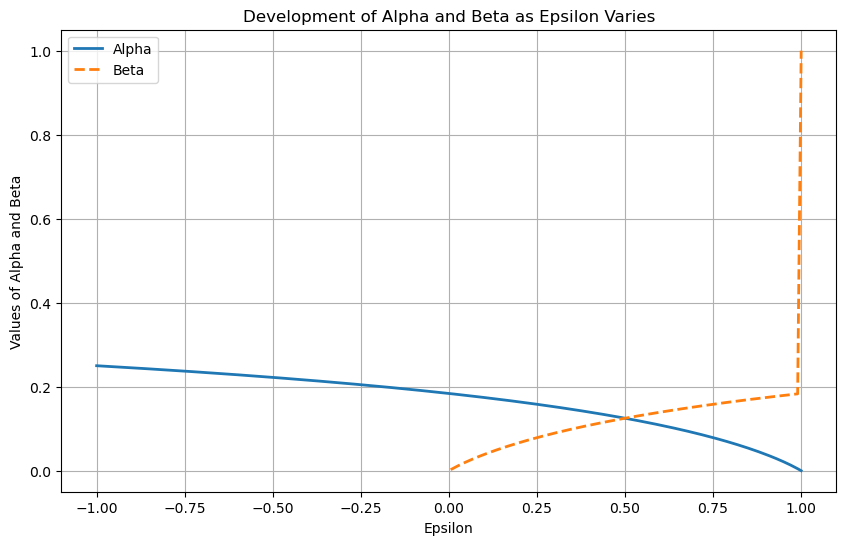

In [14]:
# Define symbols
epsilon, B, w, beta, alpha = symbols('epsilon B w beta alpha', real=True)

# Given solutions for alpha and beta
FOC_alpha_soln = [(beta**epsilon * (1-epsilon) / (B*w))**(1/epsilon)]
FOC_beta_soln = [(alpha**(1-epsilon) * epsilon / (B*w))**(-1/(epsilon-1))]

alpha_func = lambdify((epsilon, B, w, beta), FOC_alpha_soln, 'numpy')
beta_func = lambdify((epsilon, B, w, alpha), FOC_beta_soln, 'numpy')

# Values for B, w
B_val, w_val = 1, 1

# Generate epsilon values excluding 0 to avoid division by zero
epsilon_values = np.linspace(-1, 1, 200)
epsilon_values = epsilon_values[epsilon_values != 0]

# Initialize lists to store alpha and beta values
alpha_values = []
beta_values = []

# Compute values for alpha and beta
for eps in epsilon_values:
    alpha_val = alpha_func(eps, B_val, w_val, 0.5)  # Using 0.5 as a placeholder for beta
    beta_val = beta_func(eps, B_val, w_val, 0.5)  # Using 0.5 as a placeholder for alpha
    alpha_values.append(np.squeeze(alpha_val))
    beta_values.append(np.squeeze(beta_val))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epsilon_values, alpha_values, label='Alpha', linewidth=2)
plt.plot(epsilon_values, beta_values, label='Beta', linestyle='--', linewidth=2)
plt.title('Development of Alpha and Beta as Epsilon Varies')
plt.xlabel('Epsilon')
plt.ylabel('Values of Alpha and Beta')
plt.legend()
plt.grid(True)
plt.show()
